In [1]:
# import pytorch libraries
%matplotlib inline
import torch 
import torch.autograd as autograd 
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

# Intro to Pytorch

PyTorch consists of 4 main packages:
* torch: a general purpose array library similar to Numpy that can do computations on GPU
* torch.autograd: a package for automatically obtaining gradients
* torch.nn: a neural net library with common layers and cost functions
* torch.optim: an optimization package with common optimization algorithms like SGD, Adam, etc

## Pytorch tensors
Like Numpy tensors but can utilize GPUs to accelerate its numerical computations. 

In [2]:
# creating tensors from lists or numpy arrays
x = torch.tensor([[1, 2],[3, 4]])
x.shape

torch.Size([2, 2])

In [3]:
# Create random tensor
N = 5
x = torch.randn(N, 10).type(torch.FloatTensor)

In [4]:
x.shape

torch.Size([5, 10])

In [5]:
# reshaping of tensors using .view()
x.view(1,-1) #-1 makes torch infer the second dim

tensor([[-1.7481, -0.9594,  1.3700, -0.6536, -0.4444, -0.4546,  0.2393,  0.5466,
          0.6029, -0.0886, -0.9079,  0.4814,  0.2296,  0.8491,  0.2712,  1.8901,
          0.9042,  0.6683, -1.4789, -1.0898,  0.0459, -0.5641,  0.7949,  1.0128,
         -0.5180,  0.8064, -0.1605,  0.0410,  0.7690,  0.1904,  1.0563,  1.2471,
          2.0734,  0.2857,  0.7451,  0.3704, -0.2975, -0.3238, -2.0436, -0.1730,
         -1.5690, -0.2365,  0.1452, -0.5777,  1.3472,  0.3471, -0.2458,  1.0638,
          2.1069,  0.7155]])

In [6]:
x.view(1,-1).shape

torch.Size([1, 50])

In [7]:
# from tensors to numpy arrays
x.numpy()

array([[-1.7480742 , -0.9593931 ,  1.3699764 , -0.65356874, -0.44440666,
        -0.45458245,  0.23928294,  0.5466492 ,  0.602928  , -0.08858541],
       [-0.9079101 ,  0.48138094,  0.22963923,  0.84911245,  0.2712227 ,
         1.890109  ,  0.90424967,  0.66833395, -1.478872  , -1.0897563 ],
       [ 0.04591583, -0.5641075 ,  0.79489297,  1.0127643 , -0.51795614,
         0.8064038 , -0.1604978 ,  0.04097979,  0.7689716 ,  0.19038403],
       [ 1.0563445 ,  1.2471156 ,  2.073372  ,  0.28566024,  0.74511415,
         0.37038982, -0.29746354, -0.323798  , -2.0435905 , -0.1730036 ],
       [-1.5690292 , -0.23646528,  0.14521025, -0.57773626,  1.3471718 ,
         0.34710705, -0.24580973,  1.0637664 ,  2.1068652 ,  0.7154719 ]],
      dtype=float32)

## Pytorch Autograd
The autograd package in PyTorch provides classes and functions implementing automatic differentiation of arbitrary scalar valued function. For example, the gradient of the error with respect to all parameters.

`requires_grad=True` tells PyTorch that it needs to calculate the gradient with respect to this tensor. Here is an example:

In [8]:
x = torch.tensor([1., 2., 3., 4., 5., 6.], requires_grad=True)

In [9]:
# this is equivalent
x = torch.tensor([1., 2., 3., 4., 5., 6.]).requires_grad_()

In [10]:
x.grad

In [11]:
2*x**2 + 1

tensor([ 3.,  9., 19., 33., 51., 73.], grad_fn=<AddBackward0>)

In [12]:
L = (2*x**2 +1).mean()
L

tensor(31.3333, grad_fn=<MeanBackward0>)

In [13]:
L.backward() # computes the grad of L with respect to x

In [14]:
x.grad

tensor([0.6667, 1.3333, 2.0000, 2.6667, 3.3333, 4.0000])

In [15]:
# here is another example
x = torch.randn(2, 3)
x.requires_grad = True
x

tensor([[-0.2445,  1.6367,  0.1279],
        [-0.1026,  0.7715, -1.8319]], requires_grad=True)

In [16]:
L = (3*x).sum()
L

tensor(1.0713, grad_fn=<SumBackward0>)

In [17]:
L.backward()
x.grad # note, it is the same shape as x

tensor([[3., 3., 3.],
        [3., 3., 3.]])

## detach()
The detach() method constructs a new view on a tensor which is declared not to need gradients. This may be needed for example when you want to take the output to a model to numpy to compute a metric with sklean.

In [18]:
x.detach().numpy()

array([[-0.24449883,  1.6366688 ,  0.12790135],
       [-0.10264746,  0.771523  , -1.8318589 ]], dtype=float32)

Run `x.numpy()` on x after the previous computation. See what happens. How would you fix this error?

## with torch.no_grad()
Prevent the gradients from being calculated in a piece of code. This is useful at validation time.

## torch.nn module
A neural net library with common layers and cost functions

`nn.Linear(5, 3)` creates a linear transformation with parameters $A$ and $b$ ($A\cdot X+b$). Given an input matrix of observations $X$ ($N \times 5$), `nn.Linear(5, 3)` transforms X into a $N \times 3$ matrix, where $N$ can be anything (number of observations).

In [19]:
D = 5 # number of input featutes
M = 3 # neurons in the first hidden layer
linear_map = nn.Linear(D, M)

In [20]:
# parameters are initialized randomly
list(linear_map.parameters())

[Parameter containing:
 tensor([[ 0.3144, -0.0660,  0.3990,  0.0812,  0.3175],
         [-0.3104,  0.2984,  0.1506, -0.1336,  0.1550],
         [ 0.2048,  0.4024, -0.3345, -0.1245,  0.2300]], requires_grad=True),
 Parameter containing:
 tensor([-0.1191, -0.2709, -0.2018], requires_grad=True)]

In [21]:
# shape of parameters
[p.shape for p in linear_map.parameters()]

[torch.Size([3, 5]), torch.Size([3])]

In [22]:
# total number of elements per parameter tensor. 
[p.numel() for p in linear_map.parameters()]

[15, 3]

**Exercise:** Create a layer with 20 input features  and 10 output features. Compute how many total parameters do you have. 

#  Linear Regression with Pytorch

The goal of linear regression is to fit a line to a set of points.

In [23]:
# Here we generate some fake data
def lin(a,b,x): return a*x+b

def gen_fake_data(n, a, b):
    x = np.random.uniform(0,1,n) 
    y = lin(a,b,x) + 0.1 * np.random.normal(0,3,n)
    return x, y

x, y = gen_fake_data(50, 3., 8.)

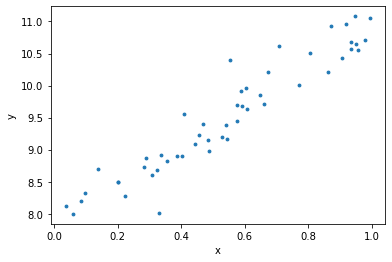

In [24]:
import matplotlib.pyplot as plt
plt.scatter(x,y, s=8); plt.xlabel("x"); plt.ylabel("y"); 

You want to find **parameters** (weights) $a$ and $b$ such that you minimize the *error* between the points and the line $a\cdot x + b$. Note that here $a$ and $b$ are unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error** ($\sum_i (\hat{y}_i - y_i)^2$). 

In [25]:
def mse(y_hat, y): return ((y_hat - y) ** 2).mean()

Suppose we believe $a = 10$ and $b = 5$ then we can compute `y_hat` which is our *prediction* and then compute our error.

In [26]:
y_hat = lin(10,5,x)
mse(y_hat, y)

4.415032714457949

In [27]:
def mse_loss(a, b, x, y): return mse(lin(a,b,x), y)

In [28]:
mse_loss(10, 5, x, y)

4.415032714457949

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for $a$ and $b$? How do we find the best *fitting* linear regression.

## Gradient Descent with Pytorch

For a fixed dataset $x$ and $y$ `mse_loss(a,b)` is a function of $a$ and $b$. We would like to find the values of $a$ and $b$ that minimize that function.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [29]:
# generate some more data
x, y = gen_fake_data(10000, 3., 8.)
x.shape, y.shape

((10000,), (10000,))

In [30]:
# Wrap x and y as tensor 
x = torch.tensor(x)
y = torch.tensor(y)

In [31]:
# Create random Tensors for weights, and wrap them in tensors.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these tensors during the backward pass.
a, b = np.random.randn(1), np.random.randn(1)
a = torch.tensor(a, requires_grad=True)
b = torch.tensor(b, requires_grad=True)
a,b

(tensor([-1.2913], dtype=torch.float64, requires_grad=True),
 tensor([-2.0688], dtype=torch.float64, requires_grad=True))

In [32]:
learning_rate = 1e-3
for t in range(10000):
    # Forward pass: compute predicted y using operations on Variables
    loss = mse_loss(a,b,x,y)
    if t % 1000 == 0: print(loss.item())
    
    # Computes the gradient of loss with respect to all Variables with requires_grad=True.
    # After this call a.grad and b.grad will be Variables holding the gradient
    # of the loss with respect to a and b respectively
    loss.backward()
    
    # Update a and b using gradient descent; a.data and b.data are Tensors,
    # a.grad and b.grad are Variables and a.grad.data and b.grad.data are Tensors
    a.data -= learning_rate * a.grad.data
    b.data -= learning_rate * b.grad.data
    
    # Zero the gradients
    a.grad.data.zero_()
    b.grad.data.zero_()    

150.75314613539416
1.0787729848098095
0.13310958838824927
0.1184308950677309
0.11164307690140554
0.10649173388918218
0.10256160453019604
0.0995630492815676
0.09727525263480687
0.09552974085392134


In [33]:
# not that a and b should be close to 3 and 8 respectively
print(a,b)

tensor([3.2191], dtype=torch.float64, requires_grad=True) tensor([7.8805], dtype=torch.float64, requires_grad=True)


## Simplified GD Loop

In [34]:
# linear tranformation with input dimension=1 and output dimension=1
nn.Linear(1, 1)

Linear(in_features=1, out_features=1, bias=True)

### Models in Pytorch

In [35]:
# simple way of specifying a linear regression model
model = torch.nn.Sequential(
    nn.Linear(1, 1),
)
model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

In [36]:
# equivalent way of specifiying the same model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.lin = nn.Linear(1, 1)
        
    def forward(self, x):
        x = self.lin(x)
        return x 
model =  LinearRegression()

In [37]:
# note here we have just two parameters, why?
print([p for p in model.parameters()])

[Parameter containing:
tensor([[0.7918]], requires_grad=True), Parameter containing:
tensor([-0.8356], requires_grad=True)]


In [38]:
x, y = gen_fake_data(10000, 3., 8.)
x = torch.tensor(x).float()
y = torch.tensor(y).float()
x.shape

torch.Size([10000])

In [39]:
# you have to be careful with the dimensions that your model is expecting
# unsqueeze dim=1 transforms [10000] to [10000, 1]
x = torch.unsqueeze(x, 1)
x.shape

torch.Size([10000, 1])

In [40]:
y_hat = model(x)
print(y_hat)

tensor([[-0.1413],
        [-0.7320],
        [-0.2927],
        ...,
        [-0.6377],
        [-0.0953],
        [-0.1042]], grad_fn=<AddmmBackward>)


In [41]:
y_hat.shape

torch.Size([10000, 1])

In [42]:
y = y.unsqueeze(1)
F.mse_loss(y_hat, y)

tensor(99.1306, grad_fn=<MseLossBackward>)

In [43]:
# validation data
x_val, y_val = gen_fake_data(1000, 3., 8.)
x_val = torch.tensor(x_val).float().unsqueeze(1)
y_val = torch.tensor(y_val).float().unsqueeze(1)

### Optimizer
Use the optim package to define an Optimizer that will update the weights of the model for us. Here we will use Adam

In [44]:
learning_rate = 0.1
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [45]:
for t in range(10000):
    # Forward pass: compute predicted y using operations on Variables
    model.train() # some layers have different behavior during train/and evaluation
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)
       
    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables
    optimizer.zero_grad()
    loss.backward() # computes gradients
    
    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    
    # checking validation loss
    model.eval()  # some layers have different behavior during train/and evaluation
    y_hat_val = model(x_val)
    val_loss = F.mse_loss(y_hat_val, y_val)
    
    if t % 1000 == 0: print("train loss %.3f valid loss %.3f" % (loss.item(), val_loss.item()))

train loss 99.131 valid loss 96.470
train loss 0.111 valid loss 0.111
train loss 0.096 valid loss 0.097
train loss 0.092 valid loss 0.094
train loss 0.091 valid loss 0.094
train loss 0.090 valid loss 0.093
train loss 0.090 valid loss 0.093
train loss 0.090 valid loss 0.093
train loss 0.090 valid loss 0.093
train loss 0.090 valid loss 0.093


In [46]:
print([p for p in model.parameters()])

[Parameter containing:
tensor([[2.9967]], requires_grad=True), Parameter containing:
tensor([7.9982], requires_grad=True)]


# Logistic Regression

In [53]:
# generating fake data
# Here we generate some fake data
def lin(a,b,x): return a*x+b

def gen_logistic_fake_data(n, a, b):
    x = np.random.uniform(-20,20, (n, 2))
    x2_hat = lin(a,b, x[:,0])
    y = x[:,1] > x2_hat
    return x, y.astype(int)

x, y = gen_logistic_fake_data(100, 1., 0.5)

In [54]:
y

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0])

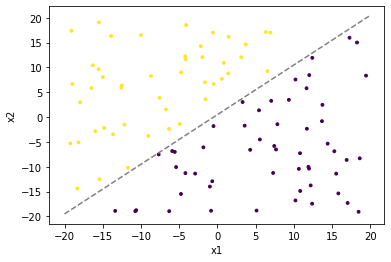

In [55]:
t = np.arange(-20, 20, 0.2)
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y, s=8)
plt.xlabel("x1"); plt.ylabel("x2");
plt.plot(t, t + 0.5, '--', c='gray')

In [56]:
x = torch.tensor(x)
y = torch.tensor(y)

In [57]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1),
)
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)

In [68]:
y_hat = model(x.float())

In [69]:
F.binary_cross_entropy_with_logits(y_hat, y.unsqueeze(1).float())

tensor(7.4256, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)

In [70]:
# generating train and val data
x, y = gen_logistic_fake_data(10000, 1., 0.5)
x = torch.tensor(x).float()
y = torch.tensor(y).float().unsqueeze(1)

x_val, y_val = gen_logistic_fake_data(1000, 1., 0.5)
x_val = torch.tensor(x_val).float()
y_val = torch.tensor(y_val).float().unsqueeze(1)

In [71]:
learning_rate = 0.1
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

In [72]:
for t in range(10000):
    # Forward pass: compute predicted y using operations on Variables
    model.train()
    y_hat = model(x)
    loss = F.binary_cross_entropy_with_logits(y_hat, y)
       
    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables
    optimizer.zero_grad()
    loss.backward()
    
    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    
    model.eval()
    y_hat_val = model(x_val)
    val_loss = F.binary_cross_entropy(torch.sigmoid(y_hat_val), y_val)
    
    if t % 1000 == 0: print("train loss %.3f valid loss %.3f" % (loss.item(), val_loss.item()))

train loss 7.151 valid loss 5.764
train loss 0.024 valid loss 0.027
train loss 0.019 valid loss 0.021
train loss 0.016 valid loss 0.018
train loss 0.013 valid loss 0.015
train loss 0.011 valid loss 0.012
train loss 0.009 valid loss 0.011
train loss 0.008 valid loss 0.009
train loss 0.007 valid loss 0.007
train loss 0.006 valid loss 0.006


In [73]:
print([p for p in model.parameters()])

[Parameter containing:
tensor([[-8.0842,  8.0862]], requires_grad=True), Parameter containing:
tensor([-3.8579], requires_grad=True)]


Exercise: Instead of using `F.binary_cross_entropy(torch.sigmoid(y_hat), y)` try `F.binary_cross_entropy_with_logits(y_hat, y)`. Look at the documentation for `F.binary_cross_entropy_with_logits`.

## How to take a vector back to numpy?

In [74]:
x, y = gen_logistic_fake_data(10, 1., 0.5)
x = torch.tensor(x).float()

In [75]:
x.numpy()

array([[  3.6044252 ,  13.593492  ],
       [  7.5224466 , -14.180548  ],
       [ -4.8933735 , -14.133529  ],
       [  8.420092  ,  17.196589  ],
       [ 16.815563  ,  -2.8977888 ],
       [ -4.9162564 ,  -9.293126  ],
       [ -0.07002173,   9.143694  ],
       [  5.9479446 ,  18.582197  ],
       [  5.559075  , -15.781488  ],
       [ 13.089842  ,  -6.2278466 ]], dtype=float32)

Exercise: Compute the accuracy of the validation logistic regression model

## Dataset and Data loaders 

Nearly all of deep learning is powered by one very important algorithm: **stochastic gradient descent (SGD)**. SGD can be seeing as an approximation of **gradient descent** (GD). In GD you have to run through *all* the samples in your training set to do a single itaration. In SGD you use *only one* or *a subset*  of training samples to do the update for a parameter in a particular iteration. The subset use in every iteration is called a **batch** or **minibatch**.

In [76]:
model2 = torch.nn.Sequential(
    torch.nn.Linear(1, 1),
)

In [77]:
from torch.utils.data import Dataset, DataLoader

In [80]:
def lin(a,b,x): return a*x+b

def gen_fake_data(n, a, b):
    x = np.random.uniform(0,1,n) 
    y = lin(a,b,x) + 0.1 * np.random.normal(0,3,n)
    return x.astype(np.float32), y.astype(np.float32)

# create a dataset
class RegressionDataset(Dataset):
    def __init__(self, a=3, b=8, n=10000):
        x, y = gen_fake_data(n, a, b)
        x = torch.from_numpy(x).unsqueeze(1)
        y = torch.from_numpy(y)
        self.x, self.y = x, y
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    
fake_train_ds = RegressionDataset()
fake_valid_ds = RegressionDataset()

In [84]:
x, y = fake_train_ds[10000-1]

In [85]:
x, y

(tensor([0.6714]), tensor(9.4025))

Next we are going to create a data loader. The data loader provides the following features:
* Batching the data
* Shuffling the data
* Load the data in parallel using multiprocessing workers.

In [86]:
train_dl = DataLoader(fake_train_ds, batch_size=1000, shuffle=True)
valid_dl = DataLoader(fake_valid_ds, batch_size=1000, shuffle=False)

In [87]:
# getting a batch of data
x, y = next(iter(train_dl))

In [88]:
x.shape, y.shape

(torch.Size([1000, 1]), torch.Size([1000]))

In [89]:
model2(x).shape

torch.Size([1000, 1])

In [90]:
from sklearn.metrics import r2_score

def val_metric(model, valid_dl):
    model.eval()
    losses = []
    y_hats = []
    ys = []
    for x, y in valid_dl:
        y = y.unsqueeze(1)
        y_hat = model(x.float())
        loss = F.mse_loss(y_hat, y.float())
        y_hats.append(y_hat.detach().numpy())
        ys.append(y.numpy())
        losses.append(loss.item())
    
    ys = np.concatenate(ys)
    y_hats = np.concatenate(y_hats)
    return np.mean(losses), r2_score(ys, y_hats)

In [91]:
valid_loss, valid_r2 = val_metric(model2, valid_dl)
valid_loss, valid_r2

(88.36927719116211, -103.92606583642083)

In [103]:
## train_loop function
def train_loop(model, train_dl, valid_dl, optimizer, epochs):
    losses = []
    for i in range(epochs):
        model.train()
        for x, y in train_dl:
            y = y.unsqueeze(1)
            y_hat = model(x.float())
            loss = F.mse_loss(y_hat, y.float())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
        
        train_loss = np.mean(losses)
        valid_loss, valid_auc = val_metric(model, valid_dl)
        print("train loss %.3f valid loss %.3f R^2 %.3f" % 
              (train_loss, valid_loss, valid_auc))

In [104]:
model2 = torch.nn.Sequential(
    torch.nn.Linear(1, 1),
)
learning_rate = 1
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)

In [105]:
train_loop(model2, train_dl, valid_dl, optimizer, epochs=20)

train loss 28.877 valid loss 8.545 R^2 -9.145
train loss 19.607 valid loss 2.420 R^2 -1.874
train loss 13.777 valid loss 3.070 R^2 -2.645
train loss 10.656 valid loss 0.649 R^2 0.229
train loss 8.649 valid loss 0.158 R^2 0.812
train loss 7.245 valid loss 0.169 R^2 0.800
train loss 6.228 valid loss 0.136 R^2 0.838
train loss 5.463 valid loss 0.103 R^2 0.878
train loss 4.866 valid loss 0.093 R^2 0.890
train loss 4.389 valid loss 0.089 R^2 0.894
train loss 3.998 valid loss 0.089 R^2 0.895
train loss 3.672 valid loss 0.089 R^2 0.895
train loss 3.397 valid loss 0.089 R^2 0.895
train loss 3.161 valid loss 0.089 R^2 0.895
train loss 2.956 valid loss 0.089 R^2 0.895
train loss 2.777 valid loss 0.089 R^2 0.895
train loss 2.619 valid loss 0.089 R^2 0.895
train loss 2.478 valid loss 0.089 R^2 0.895
train loss 2.352 valid loss 0.089 R^2 0.895
train loss 2.239 valid loss 0.089 R^2 0.895


In [106]:
optimizer = torch.optim.Adam(model2.parameters(), lr=0.1)
train_loop(model2, train_dl, valid_dl, optimizer, epochs=10)

train loss 0.097 valid loss 0.096 R^2 0.886
train loss 0.094 valid loss 0.090 R^2 0.893
train loss 0.093 valid loss 0.089 R^2 0.895
train loss 0.092 valid loss 0.089 R^2 0.895
train loss 0.092 valid loss 0.089 R^2 0.894
train loss 0.091 valid loss 0.089 R^2 0.895
train loss 0.091 valid loss 0.089 R^2 0.895
train loss 0.091 valid loss 0.089 R^2 0.895
train loss 0.091 valid loss 0.089 R^2 0.895
train loss 0.091 valid loss 0.089 R^2 0.895


In [107]:
optimizer = torch.optim.Adam(model2.parameters(), lr=0.01)
train_loop(model2, train_dl, valid_dl, optimizer, epochs=20)

train loss 0.090 valid loss 0.089 R^2 0.894
train loss 0.090 valid loss 0.089 R^2 0.895
train loss 0.090 valid loss 0.089 R^2 0.895
train loss 0.090 valid loss 0.089 R^2 0.895
train loss 0.090 valid loss 0.089 R^2 0.895
train loss 0.090 valid loss 0.089 R^2 0.895
train loss 0.090 valid loss 0.089 R^2 0.895
train loss 0.090 valid loss 0.089 R^2 0.895
train loss 0.090 valid loss 0.089 R^2 0.895
train loss 0.090 valid loss 0.089 R^2 0.895
train loss 0.090 valid loss 0.089 R^2 0.895
train loss 0.090 valid loss 0.089 R^2 0.895
train loss 0.090 valid loss 0.089 R^2 0.895
train loss 0.090 valid loss 0.089 R^2 0.895
train loss 0.090 valid loss 0.089 R^2 0.895
train loss 0.090 valid loss 0.089 R^2 0.895
train loss 0.090 valid loss 0.089 R^2 0.895
train loss 0.090 valid loss 0.089 R^2 0.895
train loss 0.090 valid loss 0.089 R^2 0.895
train loss 0.090 valid loss 0.089 R^2 0.895


**Exercise**: Play with the training of the previous model to get the max R^2 possible. Can you use larger learning rates or more epochs? 

# References
* https://pytorch.org/docs/stable/index.html
* http://pytorch.org/tutorials/beginner/pytorch_with_examples.html
* https://hsaghir.github.io/data_science/pytorch_starter/